# Doing cumulative densities right

In [186]:
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_palette("hls")
sns.set_context("notebook")

In [187]:
data = scipy.stats.gamma(5,1).rvs(200)

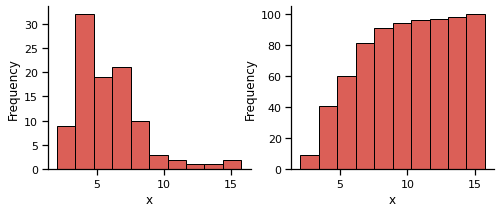

In [210]:
fig, ax = plt.subplots(1,2, figsize=(8, 3))
ax[0].hist(data,lw=1,edgecolor='k')
ax[1].hist(data,lw=1,edgecolor='k', cumulative=True)
[a.set_xlabel("x") for a in ax];
[a.set_ylabel("Frequency") for a in ax];
sns.despine()

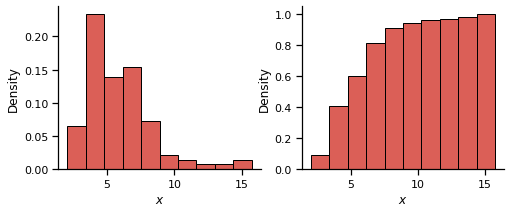

In [213]:
fig, ax = plt.subplots(1,2, figsize=(8, 3))
ax[0].hist(data, lw=1,edgecolor='k', density=True)
ax[1].hist(data,lw=1,edgecolor='k', cumulative=True, density=True)
[a.set_xlabel("$x$") for a in ax];
[a.set_ylabel("Density") for a in ax];
sns.despine()

## The empirical distribution function
TEXT ABOUT HOW TO DO IT

Our samples $X_1, ... X_N \sim F$

The empirical distribution function of our data $\hat{F}(x)$ is the cumulative distribution function (CDF) that puts density mass $1/n$ at each data point $X_i$:

$$ \hat{F}(x)  = \frac{\sum_{i=1}^{N} \text{I}(X_i \leq x)}{n}$$

where $\text{I}$ provides an indicator function that essentially counts the number of samples below each value of $x$:

$$ \text{I}(X_i \leq x) = \begin{cases}
        1 & \text{if} & X_i \leq x \\
        0 & \text{if} & X_i > x
        \end{cases} $$

so that $X_i$ is less than or equal to the current value of $x$, $\text{I}(X_i)=1$. 
  
Let's implement this in python:

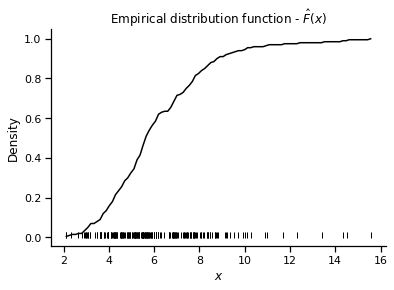

In [190]:
def edf(data ):
    x0 = data.min()
    x1 = data.max()
    x = np.linspace(x0, x1, 100)
    N = data.size
    y = np.zeros_like(x)
    for i, xx in enumerate(x):
        y[i] = np.sum(data <= xx)/N
    return x, y

# calculate it
x, y = edf(data)
# plot it
plt.plot(x, y, 'k-')
plt.title("Empirical distribution function - $\hat{F}(x)$")
plt.xlabel("$x$")
plt.ylabel("Density")
plt.plot(data, [0.01]*len(data), '|', color='k')
sns.despine()

## Confidence intervals for EDF

Explain it

A non-parametric $1-\alpha$ upper and lower confidence interval for $\hat{F}(x)$ is:

$$ \text{Lower}[\hat{F}(x)] = \text{max} [ \hat{F}(x) - \epsilon, \; 0 ] $$

$$  \text{Upper}[\hat{F}(x)] = \text{min} [ \hat{F}(x) + \epsilon, \; 1 ] $$



- Show impact of sampling (N) on confidence intervals

In [191]:
def edf(data, alpha=.05, x0=None, x1=None ):
    x0 = data.min() if x0 is None else x0
    x1 = data.max() if x1 is None else x1
    x = np.linspace(x0, x1, 100)
    N = data.size
    y = np.zeros_like(x)
    l = np.zeros_like(x)
    u = np.zeros_like(x)
    e = np.sqrt( 1.0/(2*N) *np.log(2./alpha)    )
    for i, xx in enumerate(x):
        y[i] = np.sum(data <= xx)/N
        l[i] = np.maximum( y[i] - e, 0 )
        u[i] = np.minimum( y[i] + e, 1 )
    return x, y, l, u

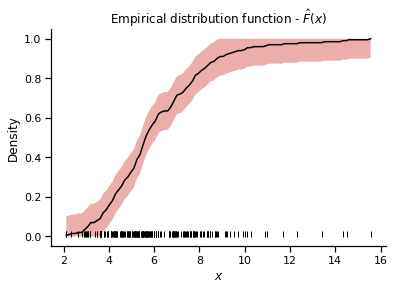

In [192]:
x, y, l, u = edf(data)
plt.fill_between(x, l, u, alpha=0.5)
plt.plot(x, y, 'k-')
plt.title("Empirical distribution function - $\hat{F}(x)$")
plt.xlabel("$x$")
plt.ylabel("Density")
plt.plot(data, [0.01]*len(data), '|', color='k')
sns.despine()

The confidence intervals really show their use when we consider the impact of the number of samples we have on the EDF:

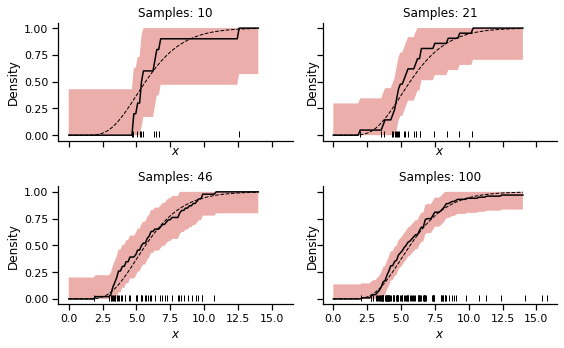

In [193]:
xcdf = np.linspace(0, 14)

fig, ax = plt.subplots(2,2, figsize=(8,5),
                               sharex=True, sharey=True, tight_layout=True)
ax = ax.flatten()
sns.despine()

Nsamps = np.logspace(1,2, 4).astype(int)
for k, Ns in enumerate(Nsamps):
    data = scipy.stats.gamma(5,1).rvs(Ns)
    # calculate edf
    x, y, l, u = edf(data, x0=0, x1=14)
    ax[k].fill_between(x, l, u, alpha=0.5)
    ax[k].plot(x, y, 'k-')
    ax[k].set_title(f"Samples: {Ns}")
    ax[k].set_xlabel("$x$")
    ax[k].set_ylabel("Density")
    ax[k].plot( xcdf, scipy.stats.gamma(5,1).cdf(xcdf),'k--' , linewidth=1   )
    ax[k].plot(data, [0.01]*len(data), '|', color='k')

So the confidence interval shrinks proportionally to $N$ and provides us a clear measure of the trust we can put in our cumulative distribution. 

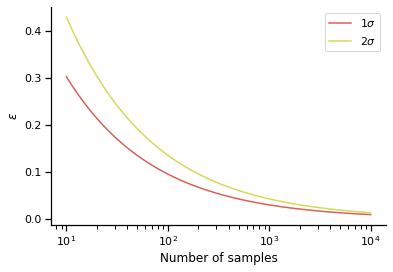

In [194]:
logN = np.logspace(1, 4)
plt.plot(logN, np.sqrt( 1.0/(2*logN) *np.log(2./.32)), label='$1\sigma$')
plt.plot(logN, np.sqrt( 1.0/(2*logN) *np.log(2./.05)), label='$2\sigma$')
plt.semilogx()
plt.ylabel("$\epsilon$")
plt.xlabel("Number of samples")
plt.legend(loc='best')
sns.despine()